# **Project Name**    - Flipkart Customer Support CSAT Prediction



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Parth Pahwa

# **Project Summary -**

Flipkart, one of India’s largest e-commerce companies, receives thousands of customer support tickets daily. Ensuring fast, accurate, and efficient resolution of these tickets is critical for maintaining high customer satisfaction. In this project, we analyze historical customer support data to identify patterns, correlations, and key factors that influence the CSAT (Customer Satisfaction) score.

The goal is to explore the dataset and uncover valuable insights that could help Flipkart optimize their support operations. Features such as ticket priority, resolution time, ticket status, product type, and department are analyzed in-depth. We examine how these attributes relate to customer satisfaction levels and visualize our findings using univariate, bivariate, and multivariate analysis.

The insights generated from this exploratory analysis will eventually serve as the foundation for building predictive ML models to forecast customer satisfaction and streamline support processes.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To analyze Flipkart’s historical customer support ticket data in order to understand and identify key factors that influence the CSAT (Customer Satisfaction) score, and prepare the dataset for predictive modeling.


#### **Define Your Business Objective?**

The business objective is to identify which features (like ticket priority, resolution time, department, status, etc.) influence customer satisfaction, in order to:
- Prioritize and route tickets more effectively,
- Predict customer satisfaction beforehand,
- Optimize agent assignment and ticket handling strategies.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [18]:
df = pd.read_csv("Customer_support_data.csv")

### Dataset First View

In [19]:
df.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [20]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 85907, Columns: 20


### Dataset Information

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [22]:
df.duplicated().sum()


np.int64(0)

#### Missing Values/Null Values

In [23]:
df.isnull().sum()


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

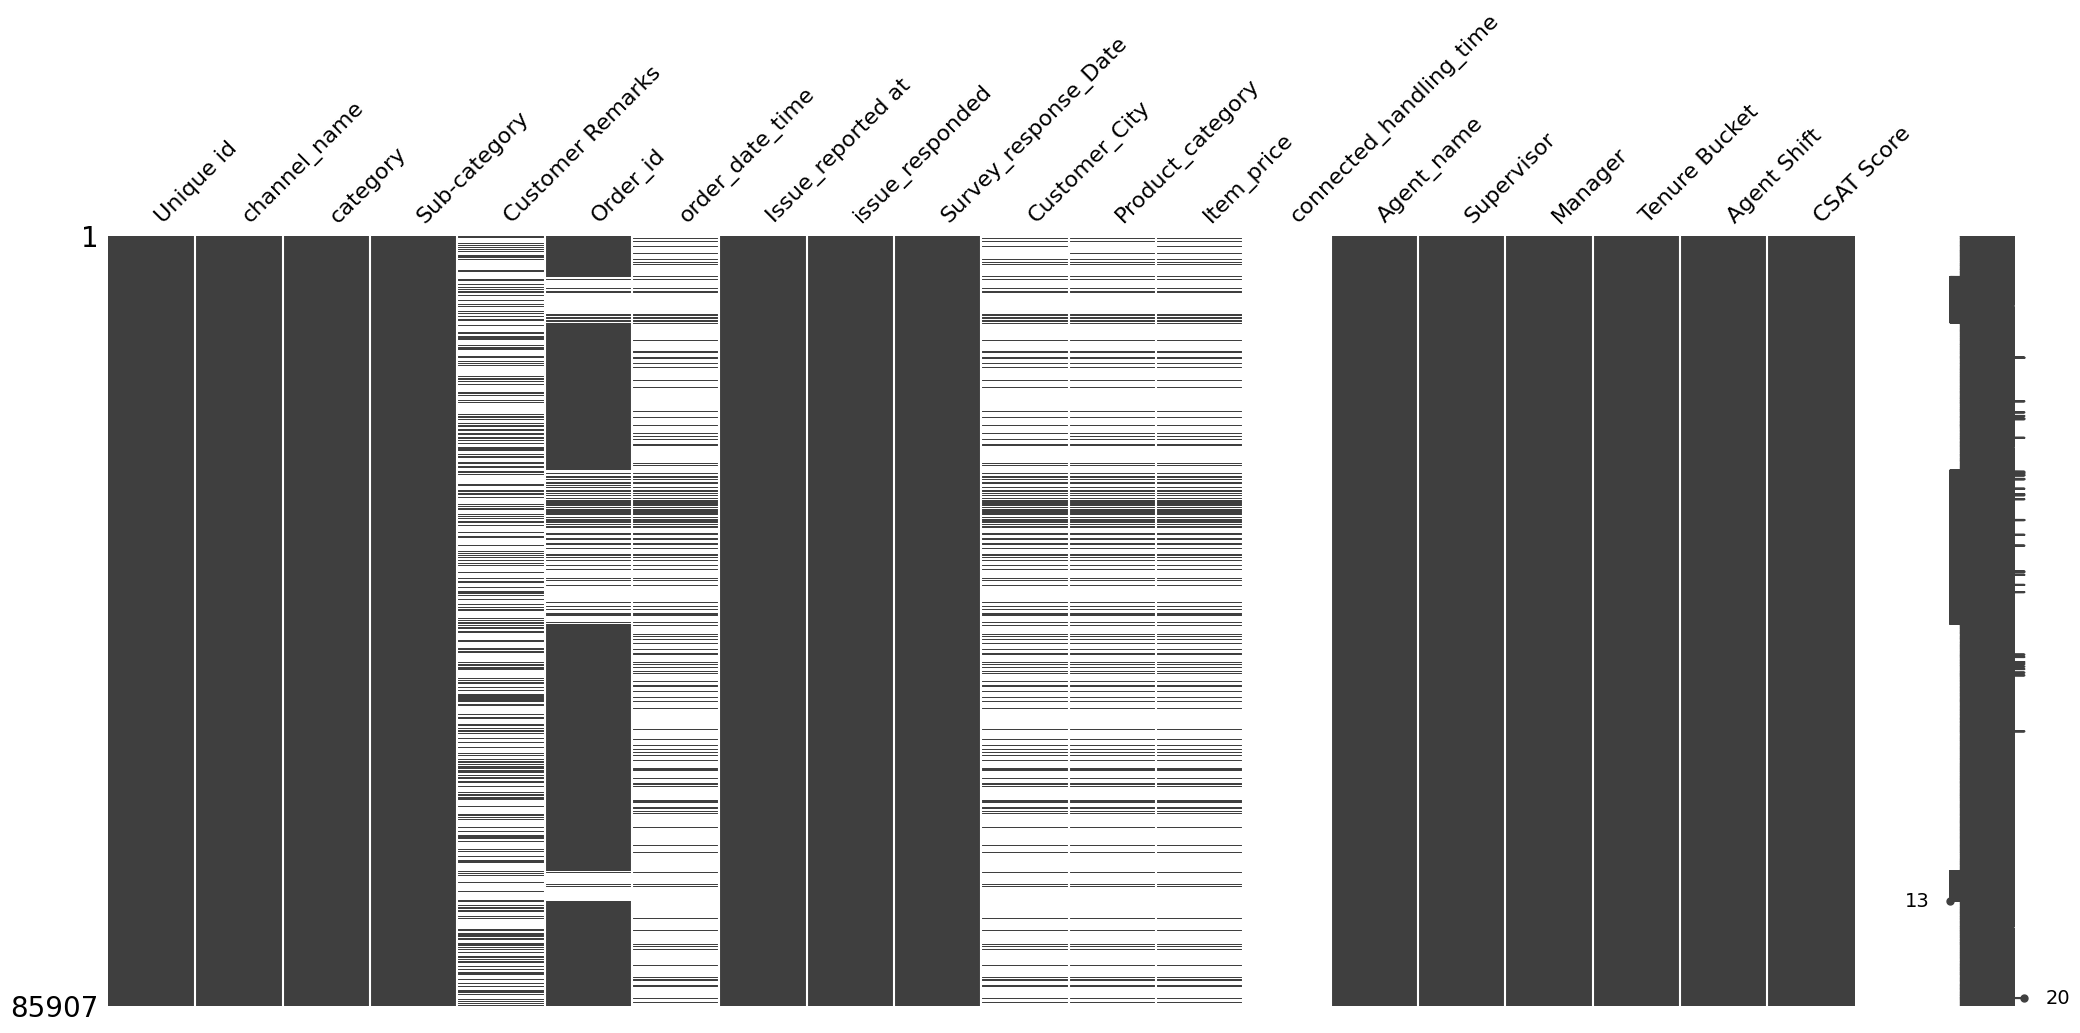

In [24]:
import missingno as msno
msno.matrix(df)
plt.show()

### What did you know about your dataset?

- 85,907 rows and 20 columns
- `CSAT Score` is the target variable, ranging from 1 to 5.
- Several categorical variables like `channel_name`, `category`, `Agent Shift`, etc.
- Features like `connected_handling_time` and `Item_price` have many missing values.
- Time columns will be used to compute response time.


## ***2. Understanding Your Variables***

In [25]:
df.columns


Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [26]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unique id,85907,85907,07c7a878-0d5a-42e0-97ef-de59abec0238,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_name,85907,3,Inbound,68142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,85907,12,Returns,44097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-category,85907,57,Reverse Pickup Enquiry,22389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Remarks,28742,18231,Good,1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,67675,67675,3230db30-f8da-4c44-8636-ec76d1d3d4f3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date_time,17214,13766,09/08/2023 11:55,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issue_reported at,85907,30923,13/08/2023 10:40,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_responded,85907,30262,28/08/2023 00:00,3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survey_response_Date,85907,31,28-Aug-23,3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

Below is the description of key variables used in the analysis:

- **Unique id**: A unique identifier assigned to each support ticket.
- **channel_name**: Indicates how the customer contacted support (e.g., Outcall, Inbound).
- **category**: Broad classification of the customer issue (e.g., Order Related, Product Queries).
- **Sub-category**: More specific classification under each category (e.g., Delay in Delivery, Installation/Demo).
- **Customer Remarks**: Comments or feedback entered by the customer (Not used in our ML model as NLP isn't required).
- **Order_id**: Unique ID for the associated order.
- **order_date_time**: When the order was placed (most values missing, not used).
- **Issue_reported at**: Timestamp of when the customer reported the issue.
- **issue_responded**: Timestamp of when the support team responded.
- **Survey_response_Date**: Date when the CSAT survey was submitted.
- **Customer_City**: City of the customer (many missing values).
- **Product_category**: Type of product associated with the ticket (e.g., Electronics, Furniture).
- **Item_price**: Price of the item (many missing values).
- **connected_handling_time**: Actual agent handling time (almost entirely missing, dropped).
- **Agent_name**: Name of the customer service representative.
- **Supervisor**: Supervisor overseeing the agent.
- **Manager**: Manager responsible for the escalation path.
- **Tenure Bucket**: Experience level of the agent (e.g., "On Job Training", "<90", ">90").
- **Agent Shift**: Time slot when the agent was working (Morning, Evening, Night).
- **CSAT Score**: Customer Satisfaction Score (our **target variable**) rated from 1 to 5.


### Check Unique Values for each variable.

In [27]:
df.nunique()


Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [28]:
# 1. Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# 2. Drop unnecessary columns with excessive missing values or no ML use
columns_to_drop = [
    'connected_handling_time',     # Only 242 non-null out of 86k
    'Customer Remarks',            # NLP not needed
    'order_date_time',             # Mostly null
    'Customer_City',               # 80% null
    'Product_category',            # 80% null
    'Item_price',                  # 80% null
    'Order_id'                     # Not useful for model
]
df.drop(columns=columns_to_drop, inplace=True)

# 3. Convert datetime columns
df['issue_reported_at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['issue_responded_at'] = pd.to_datetime(df['issue_responded'], errors='coerce')

# 4. Create derived feature: response time (in minutes)
df['response_time_min'] = (df['issue_responded_at'] - df['issue_reported_at']).dt.total_seconds() / 60

# 5. Drop rows with invalid or null response times
df = df[df['response_time_min'].notnull() & (df['response_time_min'] >= 0)]

# 6. Remove rows with missing CSAT Score (if any)
df = df[df['CSAT Score'].notnull()]


### What all manipulations have you done and insights you found?

### Data Wrangling Summary:

To make the dataset ready for analysis and modeling, we performed the following preprocessing steps:

1. **Column Name Cleaning**  
   - Removed unwanted whitespaces from column names using `str.strip()` for consistency and to avoid coding errors.

2. **Dropped Irrelevant/Incomplete Columns**  
   - Columns such as `connected_handling_time`, `Customer Remarks`, `Item_price`, etc., were either mostly null or irrelevant to ML (e.g., free text fields).
   - This step reduced noise and avoided skewing the analysis with sparse features.

3. **Datetime Conversion**  
   - Converted `Issue_reported at` and `issue_responded` to proper datetime format.
   - Essential for deriving time-based performance features.

4. **Created `response_time_min` Feature**  
   - A derived feature showing how long it took to respond to each ticket (in minutes).
   - Important for analyzing impact of responsiveness on customer satisfaction.

5. **Filtered Invalid Records**  
   - Removed rows where `response_time_min` was missing or negative (possibly due to data entry errors).
   - Ensures clean data and valid comparisons during visualization.

6. **Ensured CSAT Validity**  
   - Retained only rows with valid `CSAT Score` values (none were null in this case).

### Insights:
- Around 80% of data in columns like `Item_price` and `Product_category` was missing → best to drop.
- Derived response time gives direct insight into agent performance.
- The dataset is now clean and ready for univariate, bivariate, and multivariate analysis.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [29]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [30]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [31]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [32]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [33]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [34]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [35]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [36]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [37]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [38]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [39]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [40]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [41]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [42]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [43]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***